<h1 style="text-align:center;">lab2</h1>
<h4 style="text-align:center;">Cristopher Barrios, Josue Sagastume</h4>
<h5 style="text-align:center;">4/8/2023</h5>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Explorando datos

In [3]:
importaciones = pd.read_excel('./Data/IMPORTACION-VOLUMEN-2023-05.xlsx', skiprows=6)
consumo = pd.read_excel('./Data/CONSUMO-2023-05.xlsx', skiprows=6)
precios_2023 = pd.read_excel('./Data/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=0, skiprows=7)
precios_2022 = pd.read_excel('./Data/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=1, skiprows=6)
precios_2021 = pd.read_excel('./Data/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=2, skiprows=6)


## columnas

In [4]:
print("importaciones")
print(importaciones.columns)
print("consumo")
print(consumo.columns)
print("precios 2023")
print(precios_2023.columns)
print("precios 2022")
print(precios_2022.columns)
print("precios 2021")
print(precios_2021.columns)

importaciones
Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación'],
      dtype='object')
consumo
Index(['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas',
       'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'Orimulsión', 'Total'],
      dtype='object')
p

In [5]:
importaciones.head()

Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras   
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0  \
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke   
0            194065.738095                 820.0  ...     0.0      0.0  \
1            170703.380952                3054.0  ...     0.0      0.0   
2            161837.371429                 677.0  ...     0.0      0.0   
3            163048.642857                3399.0  ...     0.0      0.0   
4            171518.861905                 585.0  ...     0.0      0.0   

   Petróleo crudo  Solventes  Butano  Diesel alto azufre     MTBE  Orimulsión   
0             0.0        0.0     0.0           566101.99   8402.0         0.0  \
1             0.0        0.0     0.0           489525.80      0.0         0.0   
2             0.0        0.0     0.0           575559.68      0.0         0.0   
3             0.0        0.0     0.0           437745.42   8184.0         0.0   
4             0.0        0.0     0.0           552609.13  12680.0         0.0   

   Petróleo reconstituido  Total importación  
0                715344.0       2.312639e+06  
1                370166.0       1.769209e+06  
2                360530.0       1.945770e+06  
3                359527.0       1.623638e+06  
4                723346.0       2.262727e+06  

[5 rows x 25 columns]

In [6]:
print(precios_2023.head())

                 FECHA Tipo de Cambio   Superior    Regular     Diesel   
0                  NaN        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON  \
1  2023-01-01 00:00:00        7.85222      32.55      30.99      33.75   
2  2023-01-02 00:00:00        7.85222      32.55      30.99      33.75   
3  2023-01-03 00:00:00        7.84773      32.56      31.42      35.31   
4  2023-01-04 00:00:00        7.84906      32.56      31.42      35.31   

      Bunker Glp Cilindro 25Lbs. Unnamed: 7  
0  GTQ/GALON       GTQ/CIL 25 LB     GTQ/LB  
1      15.99                 122       4.88  
2      15.99                 122       4.88  
3      16.39                 122       4.88  
4      16.39                 122       4.88  


In [7]:
precios_2022.head()

FECHA Tipo de Cambio   Superior    Regular     Diesel   
0                  NaN        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON  \
1  2022-01-01 00:00:00        7.71912      28.69      27.91      24.51   
2  2022-01-02 00:00:00        7.71912      28.69      27.91      24.51   
3  2022-01-03 00:00:00        7.71912      28.79      27.99       24.6   
4  2022-01-04 00:00:00        7.71745      28.79      27.99       24.6   

      Bunker Glp Cilindro 25Lbs. Unnamed: 7  
0  GTQ/GALON       GTQ/CIL 25 LB     GTQ/LB  
1      17.28                 122       4.88  
2      17.28                 122       4.88  
3      17.91                 122       4.88  
4      17.91                 122       4.88

In [8]:
precios_2021.head()

FECHA Tipo de Cambio   Superior    Regular     Diesel   
0                  NaN        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON  \
1  2021-01-01 00:00:00        7.79382      21.91      21.11      17.61   
2  2021-01-02 00:00:00        7.79382      21.91      21.11      17.61   
3  2021-01-03 00:00:00        7.79382      21.91      21.11      17.61   
4  2021-01-04 00:00:00        7.79417      21.91      21.11      17.61   

      Bunker Glp Cilindro 25Lbs. Unnamed: 7  
0  GTQ/GALON       GTQ/CIL 25 LB     GTQ/LB  
1       13.4                  99       3.96  
2       13.4                  99       3.96  
3       13.4                  99       3.96  
4      13.45                  99       3.96

## Arreglando los datos

In [9]:
importaciones.rename(columns={'Gasolina superior': 'Superior','Gasolina regular': 'Regular'}, inplace=True)
consumo.rename(columns={'Gasolina superior': 'Superior','Gasolina regular': 'Regular'}, inplace=True)



In [10]:
Seleccion=['Fecha', 'Superior', 'Regular', 'Diesel alto azufre']
SinFecha=['Gasolina superior', 'Gasolina regular', 'Diesel alto azufre']
consumas = consumo[Seleccion]
importas = importaciones[Seleccion]


# a partir de la linea 288 para consumo ya no se toma en relevancia
# para importaciones 276
consumo = consumo[:288]
importaciones = importaciones[:276]
consumas = consumas[:270]
importas = importas[:270]

In [11]:
consumas.head()

Fecha   Superior    Regular  Diesel alto azufre
0  2000-01-01 00:00:00  308156.82  202645.20           634667.06
1  2000-02-01 00:00:00  307766.31  205530.96           642380.66
2  2000-03-01 00:00:00  331910.29  229499.56           699807.25
3  2000-04-01 00:00:00  315648.08  210680.40           586803.98
4  2000-05-01 00:00:00  319667.97  208164.34           656948.20

In [12]:
importas.head()

Fecha   Superior    Regular  Diesel alto azufre
0  2001-01-01 00:00:00  373963.96  177776.50           566101.99
1  2001-02-01 00:00:00  243091.07  123115.99           489525.80
2  2001-03-01 00:00:00  312084.38  161726.42           575559.68
3  2001-04-01 00:00:00  285054.89  127338.74           437745.42
4  2001-05-01 00:00:00  300913.67  168730.19           552609.13

In [13]:
consumas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               270 non-null    object 
 1   Superior            270 non-null    float64
 2   Regular             270 non-null    float64
 3   Diesel alto azufre  270 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.6+ KB


In [14]:
importas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               269 non-null    object 
 1   Superior            269 non-null    float64
 2   Regular             269 non-null    float64
 3   Diesel alto azufre  269 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.6+ KB


## Ahora precios

In [15]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2023.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2023.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2023.columns = nuevos_nombres_columnas
precios_2023 = precios_2023[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2023.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

In [16]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2022.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2022.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2022.columns = nuevos_nombres_columnas
precios_2022 = precios_2022[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2022.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

In [17]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2021.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2021.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2021.columns = nuevos_nombres_columnas
precios_2021 = precios_2021[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2021.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

In [18]:
precios_2023.head()

FECHA Tipo de Cambio (GTQ/USD) Superior (GTQ/GALON)   
0  2023-01-01 00:00:00                  7.85222                32.55  \
1  2023-01-02 00:00:00                  7.85222                32.55   
2  2023-01-03 00:00:00                  7.84773                32.56   
3  2023-01-04 00:00:00                  7.84906                32.56   
4  2023-01-05 00:00:00                  7.85221                32.56   

  Regular (GTQ/GALON) Diesel (GTQ/GALON) Bunker (GTQ/GALON)   
0               30.99              33.75              15.99  \
1               30.99              33.75              15.99   
2               31.42              35.31              16.39   
3               31.42              35.31              16.39   
4               31.42              35.31              16.39   

  Glp Cilindro 25Lbs. (GTQ/CIL 25 LB) Glp Cilindro 25Lbs. 7 (GTQ/LB)  
0                                 122                           4.88  
1                                 122                           4.88  
2                                 122                           4.88  
3                                 122                           4.88  
4                                 122                           4.88

In [19]:
precios_2022.head()

FECHA Tipo de Cambio (GTQ/USD) Superior (GTQ/GALON)   
0  2022-01-01 00:00:00                  7.71912                28.69  \
1  2022-01-02 00:00:00                  7.71912                28.69   
2  2022-01-03 00:00:00                  7.71912                28.79   
3  2022-01-04 00:00:00                  7.71745                28.79   
4  2022-01-05 00:00:00                  7.71558                28.79   

  Regular (GTQ/GALON) Diesel (GTQ/GALON) Bunker (GTQ/GALON)   
0               27.91              24.51              17.28  \
1               27.91              24.51              17.28   
2               27.99               24.6              17.91   
3               27.99               24.6              17.91   
4               27.99               24.6              17.91   

  Glp Cilindro 25Lbs. (GTQ/CIL 25 LB) Glp Cilindro 25Lbs. 7 (GTQ/LB)  
0                                 122                           4.88  
1                                 122                           4.88  
2                                 122                           4.88  
3                                 122                           4.88  
4                                 122                           4.88

In [20]:
precios_2021.head()

FECHA Tipo de Cambio (GTQ/USD) Superior (GTQ/GALON)   
0  2021-01-01 00:00:00                  7.79382                21.91  \
1  2021-01-02 00:00:00                  7.79382                21.91   
2  2021-01-03 00:00:00                  7.79382                21.91   
3  2021-01-04 00:00:00                  7.79417                21.91   
4  2021-01-05 00:00:00                  7.79369                21.91   

  Regular (GTQ/GALON) Diesel (GTQ/GALON) Bunker (GTQ/GALON)   
0               21.11              17.61               13.4  \
1               21.11              17.61               13.4   
2               21.11              17.61               13.4   
3               21.11              17.61              13.45   
4               21.11              17.61              13.45   

  Glp Cilindro 25Lbs. (GTQ/CIL 25 LB) Glp Cilindro 25Lbs. 7 (GTQ/LB)  
0                                  99                           3.96  
1                                  99                           3.96  
2                                  99                           3.96  
3                                  99                           3.96  
4                                  99                           3.96

---------------------------

In [21]:

# Uniendo las 3 hojas
precios = pd.concat([precios_2023, precios_2022, precios_2021], ignore_index=True)


In [22]:
precios

FECHA   
0                                  2023-01-01 00:00:00  \
1                                  2023-01-02 00:00:00   
2                                  2023-01-03 00:00:00   
3                                  2023-01-04 00:00:00   
4                                  2023-01-05 00:00:00   
..                                                 ...   
956                                2021-12-29 00:00:00   
957                                2021-12-30 00:00:00   
958                                2021-12-31 00:00:00   
959  Fuente precios nacionales: Sección Comercializ...   
960         Fuente tipo de cambio: Banco de Guatemala.   

    Tipo de Cambio (GTQ/USD) Superior (GTQ/GALON) Regular (GTQ/GALON)   
0                    7.85222                32.55               30.99  \
1                    7.85222                32.55               30.99   
2                    7.84773                32.56               31.42   
3                    7.84906                32.56               31.42   
4                    7.85221                32.56               31.42   
..                       ...                  ...                 ...   
956                  7.71924                28.69               27.91   
957                  7.71912                28.69               27.91   
958                  7.71912                28.69               27.91   
959                      NaN                  NaN                 NaN   
960                      NaN                  NaN                 NaN   

    Diesel (GTQ/GALON) Bunker (GTQ/GALON) Glp Cilindro 25Lbs. (GTQ/CIL 25 LB)   
0                33.75              15.99                                 122  \
1                33.75              15.99                                 122   
2                35.31              16.39                                 122   
3                35.31              16.39                                 122   
4                35.31              16.39                                 122   
..                 ...                ...                                 ...   
956              24.51              17.28                                 122   
957              24.51              17.28                                 122   
958              24.51              17.28                                 122   
959                NaN                NaN                                 NaN   
960                NaN                NaN                                 NaN   

    Glp Cilindro 25Lbs. 7 (GTQ/LB)  
0                             4.88  
1                             4.88  
2                             4.88  
3                             4.88  
4                             4.88  
..                             ...  
956                           4.88  
957                           4.88  
958                           4.88  
959                            NaN  
960                            NaN  

[961 rows x 8 columns]

## Importacion

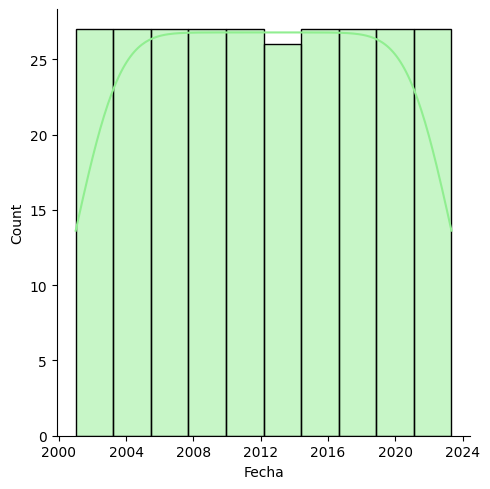

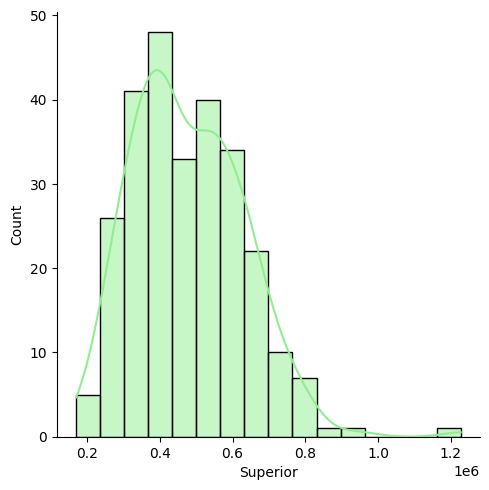

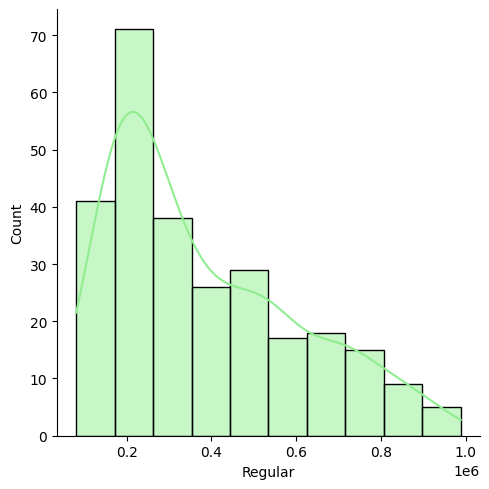

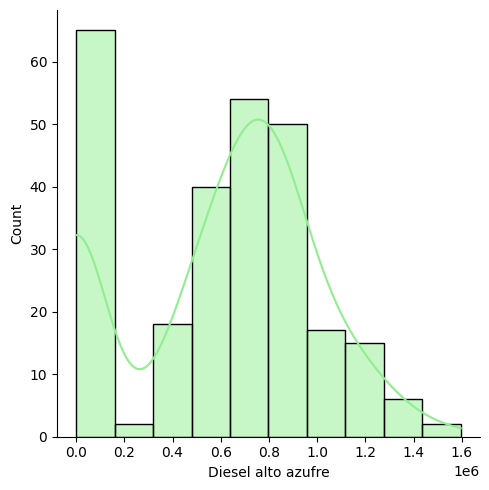

In [23]:
for var in Seleccion:
    sns.displot(importas[var], kde=True, color = 'lightgreen')

## Consumo

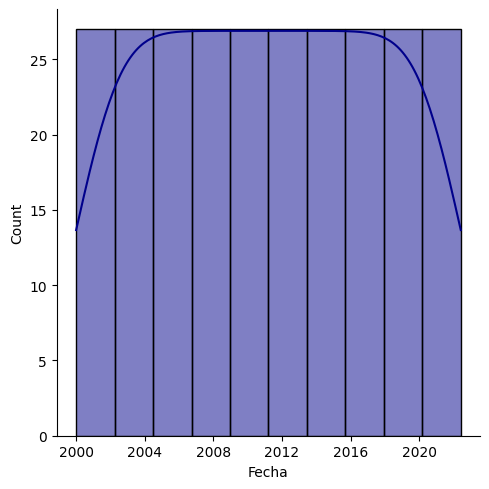

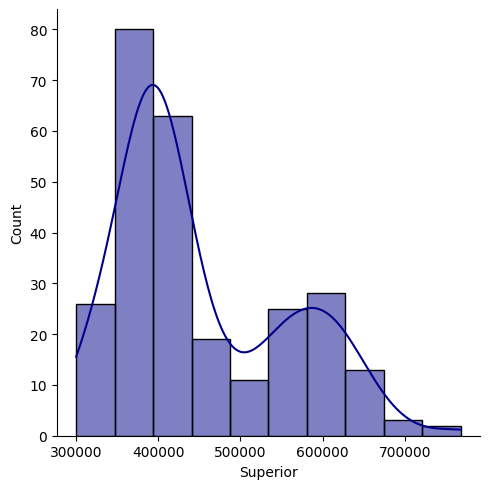

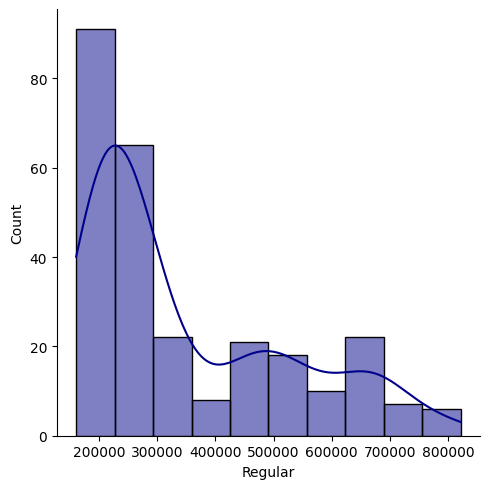

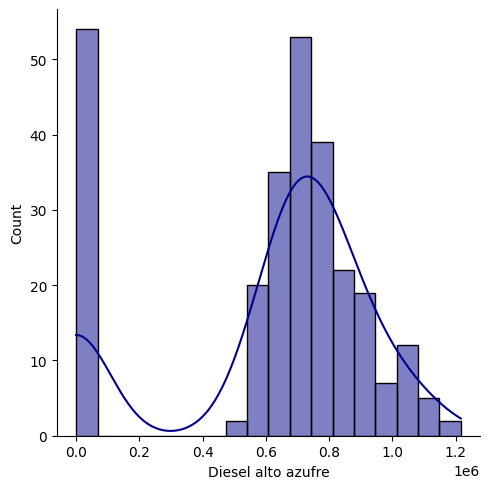

In [24]:
for var in Seleccion:
    sns.displot(consumas[var], kde=True, color='darkblue')

## Precios

In [25]:
columnas_seleccion = ['FECHA', 'Tipo de Cambio (GTQ/USD)', 'Superior (GTQ/GALON)',
                      'Regular (GTQ/GALON)', 'Diesel (GTQ/GALON)', 'Bunker (GTQ/GALON)',
                      'Glp Cilindro 25Lbs. (GTQ/CIL 25 LB)',
                      'Glp Cilindro 25Lbs. 7 (GTQ/LB)']

Error al generar el gráfico para 'FECHA': Failed to convert value(s) to axis units: 0                                    2021-01-01 00:00:00
1                                    2021-01-02 00:00:00
2                                    2021-01-03 00:00:00
3                                    2021-01-04 00:00:00
4                                    2021-01-05 00:00:00
                             ...                        
362                                  2021-12-29 00:00:00
363                                  2021-12-30 00:00:00
364                                  2021-12-31 00:00:00
365    Fuente precios nacionales: Sección Comercializ...
366           Fuente tipo de cambio: Banco de Guatemala.
Name: x, Length: 367, dtype: object


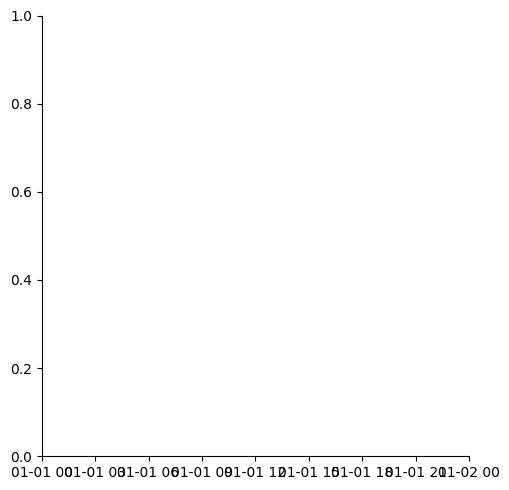

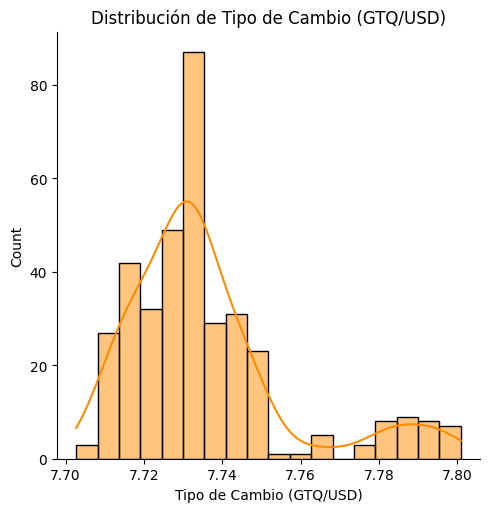

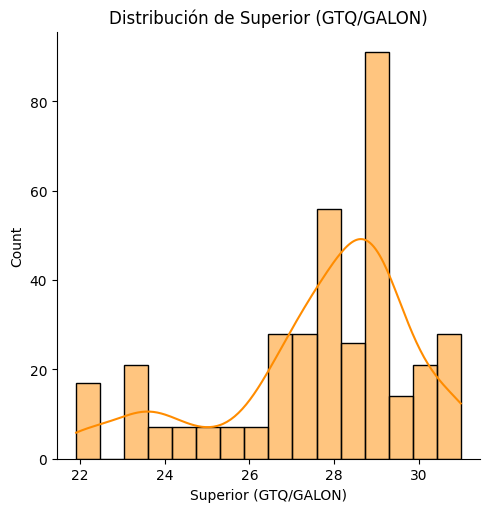

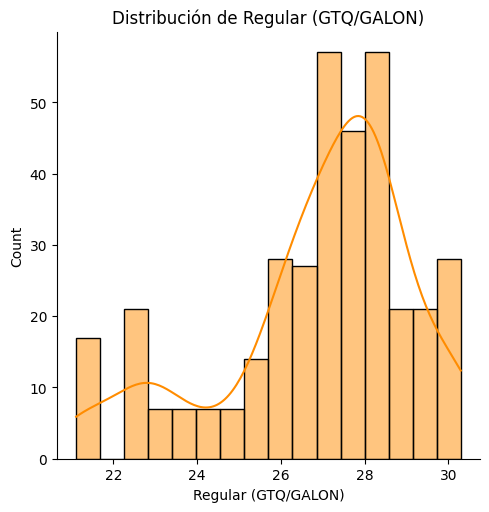

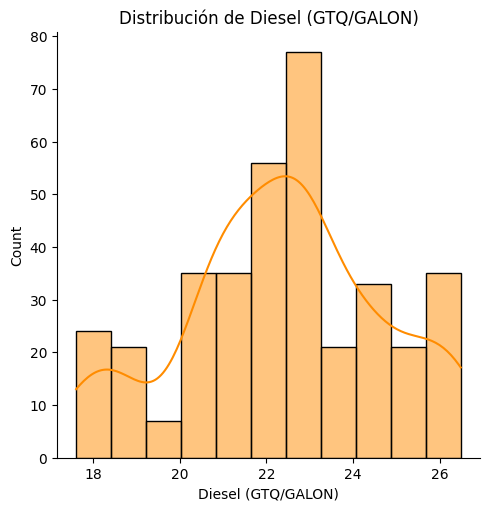

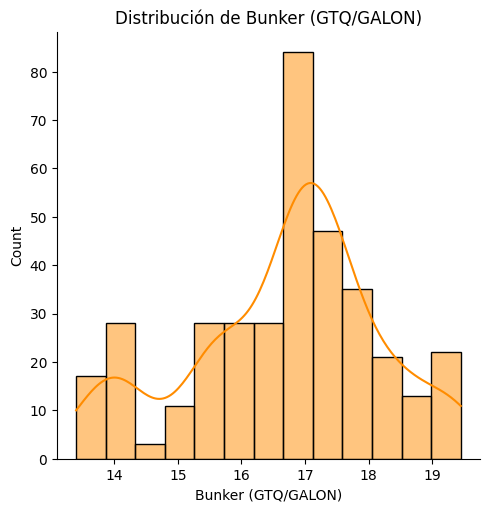

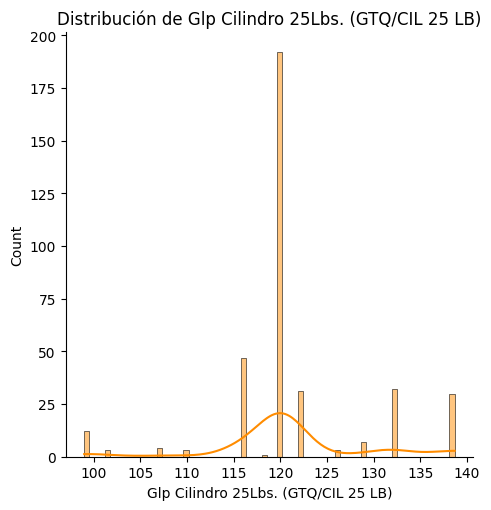

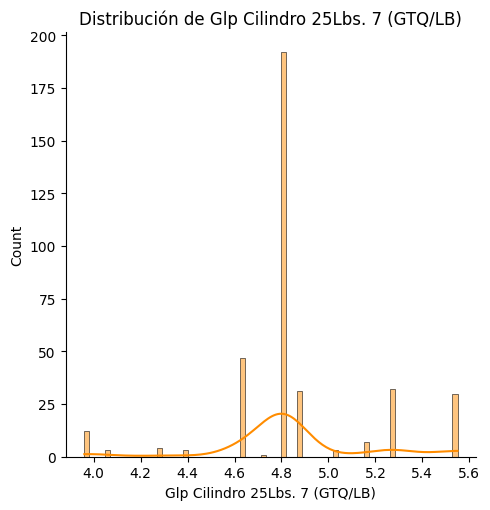

In [26]:

# Iterar a través de las columnas y generar los gráficos
for col in columnas_seleccion:
    try:
        sns.displot(precios_2021[col], kde=True, color='darkorange')
        plt.title(f'Distribución de {col}')
        plt.show()
    except Exception as e:
        print(f"Error al generar el gráfico para '{col}': {e}")

In [27]:
consumas['Date'] = pd.to_datetime(consumas['Fecha'], format='%Y%m$d %H%M$s')

In [28]:
importas['Date'] = pd.to_datetime(importas['Fecha'], format='%Y%m$d %H%M$s')

In [29]:
consumas.head()

Fecha   Superior    Regular  Diesel alto azufre       Date
0  2000-01-01 00:00:00  308156.82  202645.20           634667.06 2000-01-01
1  2000-02-01 00:00:00  307766.31  205530.96           642380.66 2000-02-01
2  2000-03-01 00:00:00  331910.29  229499.56           699807.25 2000-03-01
3  2000-04-01 00:00:00  315648.08  210680.40           586803.98 2000-04-01
4  2000-05-01 00:00:00  319667.97  208164.34           656948.20 2000-05-01

In [30]:
importas.head()

Fecha   Superior    Regular  Diesel alto azufre       Date
0  2001-01-01 00:00:00  373963.96  177776.50           566101.99 2001-01-01
1  2001-02-01 00:00:00  243091.07  123115.99           489525.80 2001-02-01
2  2001-03-01 00:00:00  312084.38  161726.42           575559.68 2001-03-01
3  2001-04-01 00:00:00  285054.89  127338.74           437745.42 2001-04-01
4  2001-05-01 00:00:00  300913.67  168730.19           552609.13 2001-05-01

In [31]:
consumas.index = consumas.Date
importas.index = importas.Date


def plot_df(x, y, title="", xlabel='Date', ylabel='Value', dpi=1000):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [32]:
plot_df(x=consumas.Date, y=consumas.Superior, title='Consumo de Super')
plot_df(x=consumas.Date, y=consumas.Regular, title='Consumo de Regular')
plot_df(x=consumas.Date, y=consumas['Diesel alto azufre'], title='Consumo de diesel')

In [33]:
importas.head()

Fecha   Superior    Regular  Diesel alto azufre   
Date                                                                        
2001-01-01  2001-01-01 00:00:00  373963.96  177776.50           566101.99  \
2001-02-01  2001-02-01 00:00:00  243091.07  123115.99           489525.80   
2001-03-01  2001-03-01 00:00:00  312084.38  161726.42           575559.68   
2001-04-01  2001-04-01 00:00:00  285054.89  127338.74           437745.42   
2001-05-01  2001-05-01 00:00:00  300913.67  168730.19           552609.13   

                 Date  
Date                   
2001-01-01 2001-01-01  
2001-02-01 2001-02-01  
2001-03-01 2001-03-01  
2001-04-01 2001-04-01  
2001-05-01 2001-05-01

In [34]:
plot_df(x=importas.Date, y=importas.Superior, title='Importacion de Super')
plot_df(x=importas.Date, y=importas.Regular, title='Importacion de Regular')
plot_df(x=importas.Date, y=importas['Diesel alto azufre'], title='Importacion de Diesel')

# Descomposiciones

### Super

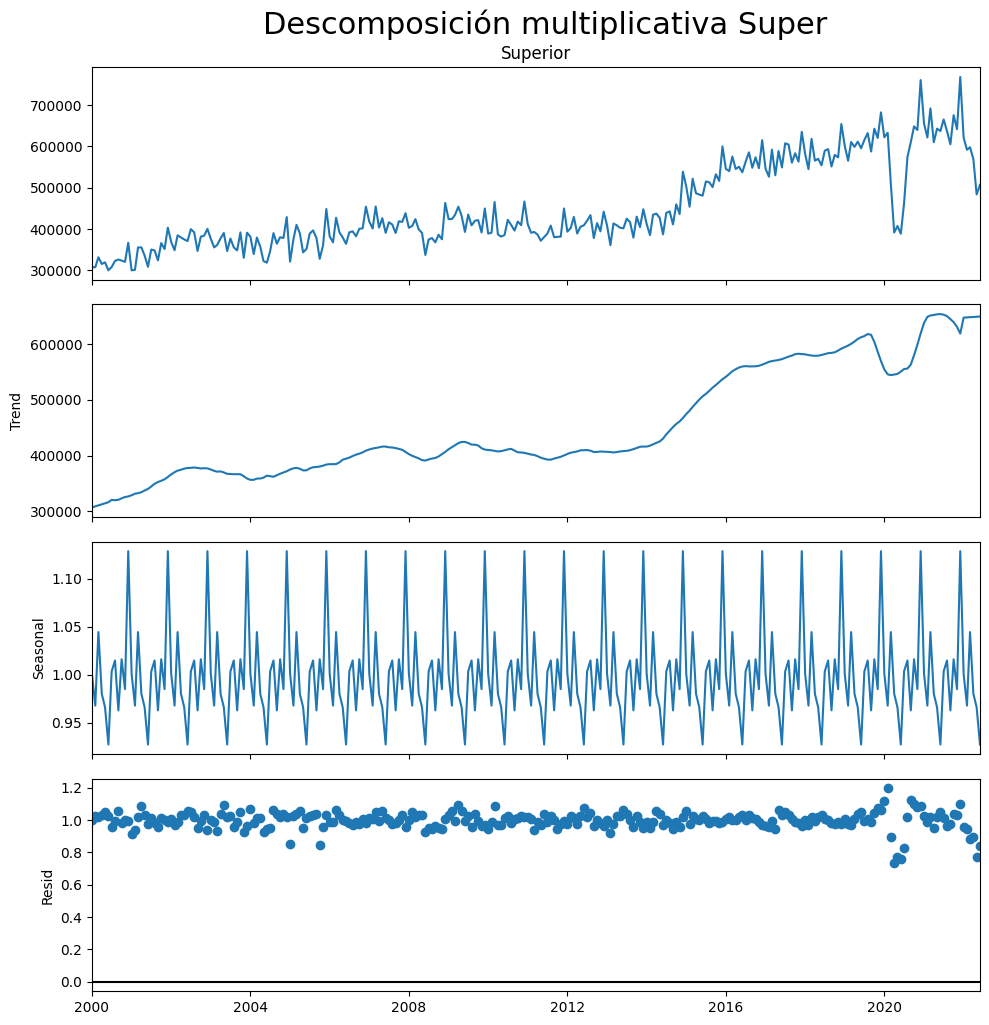

In [35]:
result_mul = seasonal_decompose(
    consumas['Superior'], 
    model='multiplicative', 
    extrapolate_trend='freq'
)

plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición multiplicativa Super', fontsize=22, x=0.55, y=1.02)

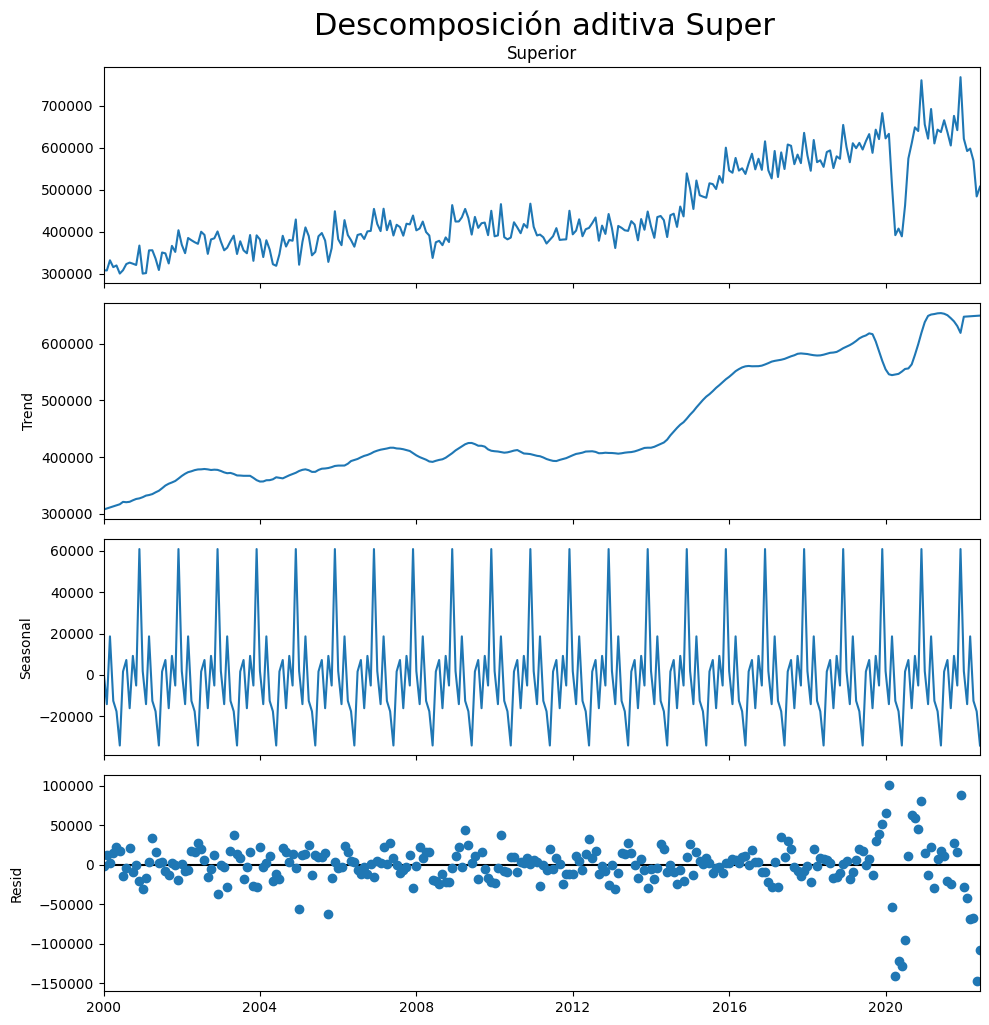

In [36]:
result_add = seasonal_decompose(consumas['Superior'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición aditiva Super', fontsize=22, x=0.55, y=1.02)

### Regular

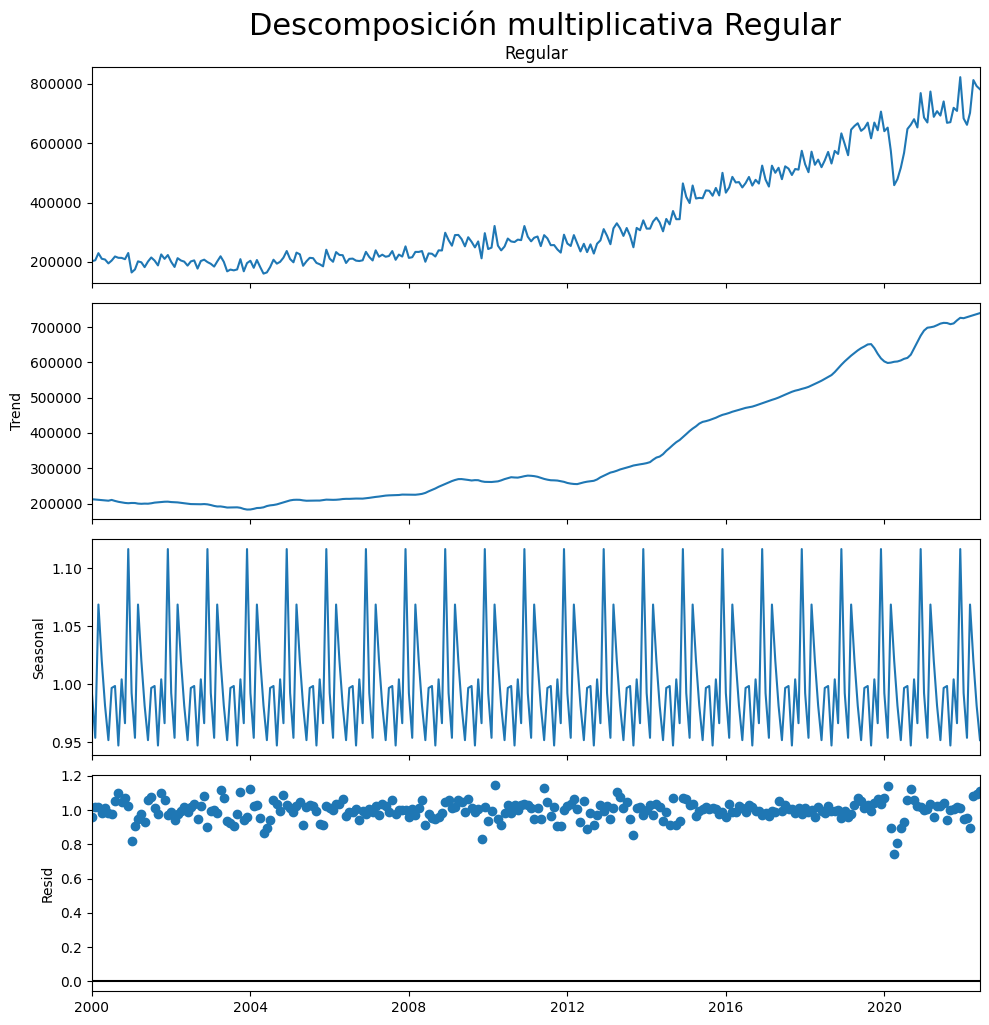

In [37]:
result_mul = seasonal_decompose(
    consumas['Regular'], 
    model='multiplicative', 
    extrapolate_trend='freq'
)

plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición multiplicativa Regular', fontsize=22, x=0.55, y=1.02)

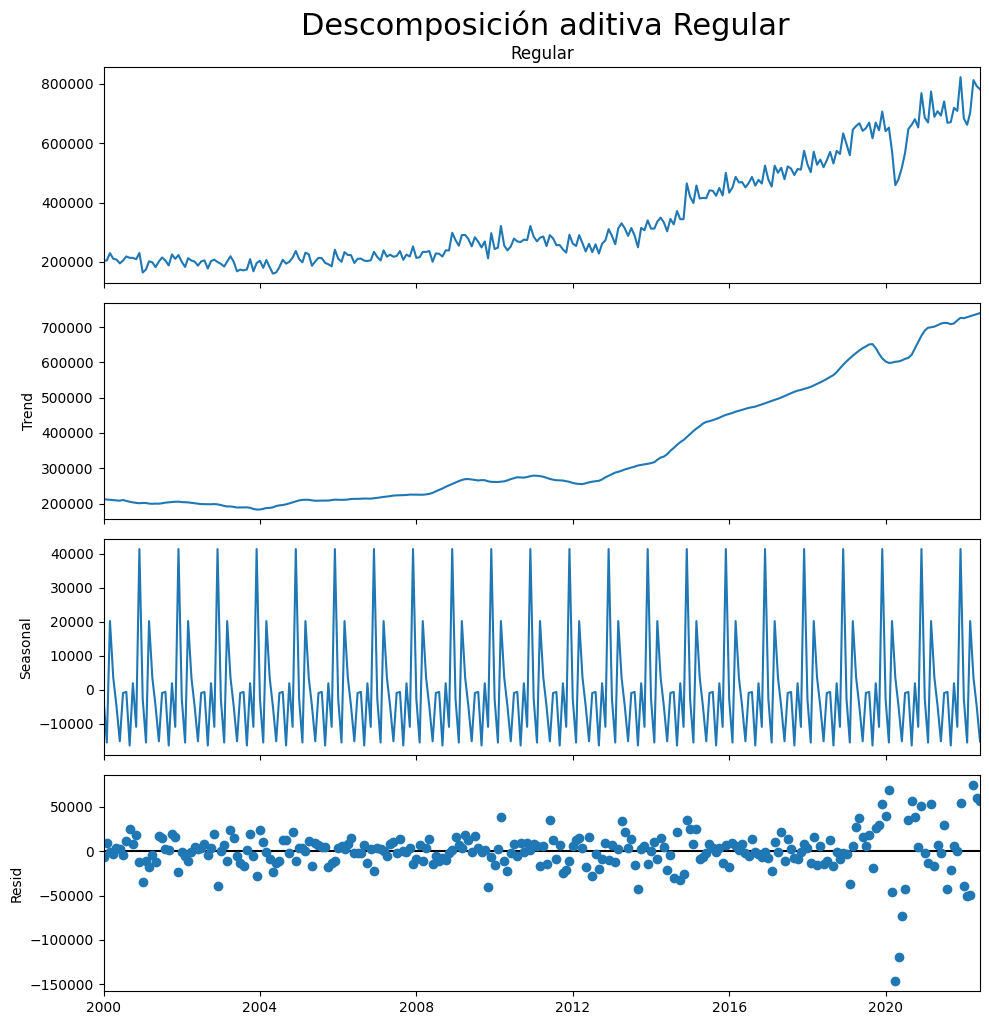

In [38]:
result_add = seasonal_decompose(consumas['Regular'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición aditiva Regular', fontsize=22, x=0.55, y=1.02)

## Transformaciones

### Consumo

In [39]:
logConsumoSuper = np.log10(consumas.Superior)

result = adfuller(logConsumoSuper)

print('p-value: %f' % result[1])

p-value: 0.606998


In [40]:
logConsumoRegular = np.log10(consumas.Regular)

result = adfuller(logConsumoRegular)

print('p-value: %f' % result[1])

p-value: 0.995445


### Importación

In [41]:
logImportacionSuper = np.log10(importas.Superior)

# adf test
result = adfuller(logImportacionSuper)

print('p-value: %f' % result[1])

p-value: nan


In [42]:
logImportacionRegular = log(importas.Regular)

# adf test
result = adfuller(logImportacionRegular)

print('p-value: %f' % result[1])

p-value: nan
